In [60]:
from odes.models import SIR, nUIV
from odes.integrator import integrator
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [47]:
dt = 0.01
sim_time = 100

num_steps = int(sim_time/dt)

## SIR Model

In [48]:
beta = 0.2
gamma = 0.04
num_hosts = 20
SIR_x0 = np.array([0.8, 0.2, 0])*num_hosts

In [49]:
SIR_ODE = SIR(num_hosts, beta, gamma)
SIR_stepper = integrator(SIR_ODE, SIR_x0, dt)

t = np.linspace(0, sim_time, num_steps+1)
x = np.zeros((3,num_steps+1))
x[:,0] = SIR_x0

In [50]:
for i in range(1,num_steps+1):
    x[:,i] = SIR_stepper.step()
    t[i] = SIR_stepper.t

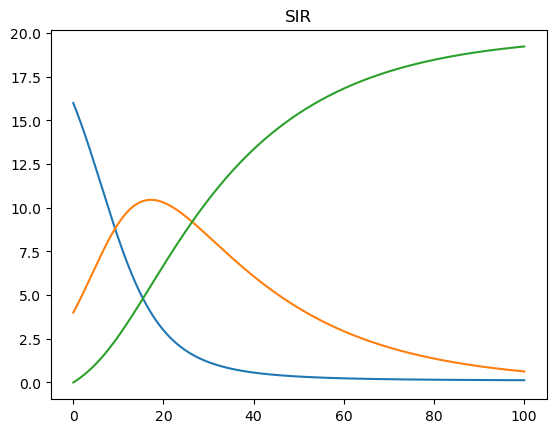

In [52]:
plt.title("SIR")
plt.plot(t, x.T)
plt.show()

## nUIV Model

In [54]:
edge_prob = 0.75  # probability of an edge between two
G = nx.fast_gnp_random_graph(num_hosts, edge_prob, directed=True)

In [58]:
def randrange(l, u):
    return l+(u-l)*np.random.rand()

In [59]:
for n in G:
    exhale = np.random.rand()*0.01
    G.nodes[n]['beta'] = randrange(1.0, 5.1)
    G.nodes[n]['delta'] = randrange(0.71, 1.91)
    G.nodes[n]['p'] = randrange(1, 10)
    G.nodes[n]['c'] = randrange(2.2, 2.4)
    G.nodes[n]['state'] = np.random.rand(3)*4

    G.add_edge(n, n, transmit=-exhale)
    for nbr in G.successors(n):
        to_nbr = np.random.rand()*exhale
        exhale -= to_nbr
        G[n][nbr]['transmit'] = to_nbr

In [61]:
nUIV_ODE = nUIV(G)

nUIV_x0 = nUIV_ODE.get_graph_state()
nUIV_stepper = integrator(nUIV_ODE, nUIV_x0, dt)
nUIV_states = np.zeros((3*num_hosts, num_steps+1))
nUIV_states[:, 0] = nUIV_x0

In [62]:
for i in range(1,num_steps+1):
    nUIV_states[:,i] = nUIV_stepper.step()

In [78]:
nUIV_aggr = np.zeros((3,num_steps+1))
for i in range(3):
    nUIV_aggr[i] =  nUIV_states[i::3,:].sum(axis=0)

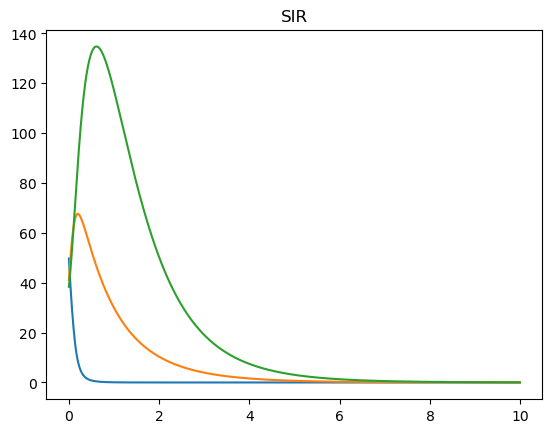

In [81]:
plt.title("SIR")
plt.plot(t[0:1000], nUIV_aggr.T[0:1000])
plt.show()